# Analyzing Kaggle Spotify Charts Dataset, extracting relevant data, identifying missing parts

Spotify has become one of the big players in the global music market over the recent years. Because it has hundreds of millions users streaming songs across the globe, its several [music rankings/charts](https://charts.spotify.com/home). The daily Top 200 most streamed songs are therefore probably also a solid estimate for the popularity of pieces of music.

After quite some time spent searching, I finally found [this](https://www.kaggle.com/datasets/dhruvildave/spotify-charts) dataset on Kaggle. It contains the Top 200 and Viral 50 daily charts for several countries across five years, from 2017 up until the end of 2021. I've downloaded and extracted the ZIP archive. 

This notebook documents why I ended up using only the Top 50 for 50 out of the initial 70 countries and what missing data I identified.

## Analyzing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [1]:
from helpers import get_data_path, create_data_out_path

The CSV is **really** big (3.5 GB), so loading it will take quite a while...

In [4]:
charts = pd.read_csv(
    get_data_path("charts.csv"),
    dtype={
        "title": "category",
        "artist": "category",
        "url": "category",
        "region": "category",
        "chart": "category",
        "trend": "category",
    },
    parse_dates=["date"]
)
charts

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


This is really is a huge dataset, with around 26 mio. rows! It is very nice that we really have data separated by region.

### Column value counts

In [5]:
charts.trend.value_counts()

MOVE_DOWN        11220434
MOVE_UP           9801048
SAME_POSITION     3298392
NEW_ENTRY         1853640
Name: trend, dtype: int64

In [6]:
charts.chart.value_counts()

top200     20321904
viral50     5851610
Name: chart, dtype: int64

In [7]:
charts.region.value_counts()

Argentina        455308
United States    455057
Austria          454593
Brazil           454439
Australia        453103
                  ...  
Ukraine          127544
Russia           126837
Luxembourg        98053
Andorra           79592
South Korea       76276
Name: region, Length: 70, dtype: int64

In [8]:
charts.url.nunique()

217704

In [9]:
charts.artist.nunique()

96156

Those numbers are quite surprising: more than 96k artists and 217k songs? Personally, I wouldn't have expected that much variety.

### Extracting Top 200 data

The viral Top 50 aren't of much interest, as they are apparently [curated](https://community.spotify.com/t5/Your-Library/What-s-the-difference-between-daily-top-50-and-viral-top-50/td-p/4973312) and not purely based on numbers of streams. In general, the provenance of the Viral Top 50 data seems to not be explained in detail at all by Spotify. So, we'll stick to the Top 200, which are based on pure numbers of streams.

In [10]:
top200 = charts.loc[charts.chart == 'top200'].drop(columns="chart")
top200

,title,rank,date,artist,url,region,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...
25276069,Ojalá (feat. Darell),196,2018-01-31,"De La Ghetto, Almighty, Bryant Myers",https://open.spotify.com/track/3EMDvnVpQd9RZJv...,Uruguay,MOVE_DOWN,1178.0
25276070,Lo Que Pasa en la Noche,197,2018-01-31,Mano Arriba,https://open.spotify.com/track/2eOleVJlGvBE027...,Uruguay,NEW_ENTRY,1178.0
25276071,El Equivocado,198,2018-01-31,Mano Arriba,https://open.spotify.com/track/5vy1C7DD9xJ5fRB...,Uruguay,MOVE_DOWN,1170.0
25276072,Que Fui Tu Amante,199,2018-01-31,El Gucci y Su Banda,https://open.spotify.com/track/1fmiCxwEbZFIszI...,Uruguay,MOVE_DOWN,1165.0


### Verifying completeness of data

In [11]:
top200.date.min()

Timestamp('2017-01-01 00:00:00')

In [12]:
top200.date.max()

Timestamp('2021-12-31 00:00:00')

At first glance it looks like we indeed have data for 5 years. But is it really complete for all countries/regions?

In [13]:
top200_rows_per_day_and_region = top200.loc[:,["date","region"]].groupby("date").value_counts()
top200_rows_per_day_and_region

date        region   
2017-01-01  Argentina    200
            Ecuador      200
            Italy        200
            Ireland      200
            Indonesia    200
                        ... 
2021-12-31  Iceland        0
            Italy          0
            Ireland        0
            Norway         0
            Ukraine        0
Length: 127610, dtype: int64

looks like some data is missing...

In [14]:
top_less_than200 = top200_rows_per_day_and_region.loc[top200_rows_per_day_and_region != 200].reset_index()
top_less_than200

,date,region,0
0,2017-01-01,Uruguay,199
1,2017-01-01,Czech Republic,136
2,2017-01-01,Guatemala,130
3,2017-01-01,Dominican Republic,129
4,2017-01-01,Panama,111
...,...,...,...
37172,2021-12-31,Iceland,0
37173,2021-12-31,Italy,0
37174,2021-12-31,Ireland,0
37175,2021-12-31,Norway,0


In [15]:
top_less_than200.region.unique()

['Uruguay', 'Czech Republic', 'Guatemala', 'Dominican Republic', 'Panama', ..., 'Singapore', 'Turkey', 'Taiwan', 'Switzerland', 'Portugal']
Length: 70
Categories (70, object): ['Andorra', 'Argentina', 'Australia', 'Austria', ..., 'United Arab Emirates', 'Russia', 'South Korea', 'Ukraine']

Oh no, does that mean that we don't have 100% complete data for any of the countries?

In [16]:
top200_tracks = top200.url.unique()
top200_tracks

['https://open.spotify.com/track/6mICuAdrwEjh6Y..., 'https://open.spotify.com/track/7DM4BPaS7uofFu..., 'https://open.spotify.com/track/3AEZUABDXNtecA..., 'https://open.spotify.com/track/6rQSrBHf7HlZjt..., 'https://open.spotify.com/track/58IL315gMSTD37..., ..., 'https://open.spotify.com/track/2SahFuW1EZN9MX..., 'https://open.spotify.com/track/7E7SO2gZLbJK4C..., 'https://open.spotify.com/track/0UBLhedidy1DjS..., 'https://open.spotify.com/track/0mSYnR1ubvlot6..., 'https://open.spotify.com/track/1AY9xgjHNSn3oP...]
Length: 118835
Categories (217704, object): ['https://open.spotify.com/track/000xYdQfIZ4pDm..., 'https://open.spotify.com/track/00Hj710RrsLX5s..., 'https://open.spotify.com/track/00ISNjqq27aOPy..., 'https://open.spotify.com/track/00NRTjNn3CZPi2..., ..., 'https://open.spotify.com/track/6m0reQAyu3kr63..., 'https://open.spotify.com/track/7FMqXP0Cywpmcf..., 'https://open.spotify.com/track/7jjyTsvL9gjK64..., 'https://open.spotify.com/track/7mJEkaq5H2EMZs...]

In theory, if our data were complete, we would have $\text{no. of countries} \cdot \text{no. of tracks in charts} = 70 \cdot 200$ rows for each day. Let's check what reality looks like:

In [17]:
ideal_daily_row_count_top200 = 70 * 200
ideal_daily_row_count_top200

14000

In [18]:
top200.groupby("date").date.count()

date
2017-01-01    8621
2017-01-02    8706
2017-01-03    8801
2017-01-04    8839
2017-01-05    8870
              ... 
2021-12-27    1334
2021-12-28    1343
2021-12-29    1342
2021-12-30    1355
2021-12-31    1379
Name: date, Length: 1823, dtype: int64

Hmm, that really is a lot of missing data... Let's try to look only at the top 50, maybe that helps...

In [19]:
total_no_of_dates = top200.date.nunique()
total_no_of_dates

1823

In [20]:
top50 = top200.loc[top200["rank"] <= 50]
top50

,title,rank,date,artist,url,region,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...
25275919,Explícale (feat. Bad Bunny),46,2018-01-31,Yandel,https://open.spotify.com/track/1LszjjoVwDDZcWU...,Uruguay,MOVE_DOWN,4560.0
25275920,Nena Maldicion (feat. Lenny Tavarez),47,2018-01-31,"Paulo Londra, Lenny Tavárez",https://open.spotify.com/track/3TnhQSRwT3AVMdX...,Uruguay,MOVE_UP,4406.0
25275921,Ahora Dice,48,2018-01-31,"Chris Jedi, J Balvin, Ozuna, Arcangel",https://open.spotify.com/track/22eADXu8DfOAUED...,Uruguay,SAME_POSITION,4316.0
25275922,La fórmula (feat. Chris Jedi),49,2018-01-31,"De La Ghetto, Daddy Yankee, Ozuna",https://open.spotify.com/track/4XCQtUoRSh22Ep1...,Uruguay,SAME_POSITION,4272.0


In [21]:
ideal_daily_row_count_top50 = 70 * 50
ideal_daily_row_count_top50

3500

In [22]:
top50.groupby("date").date.count()

date
2017-01-01    2532
2017-01-02    2623
2017-01-03    2666
2017-01-04    2647
2017-01-05    2639
              ... 
2021-12-27     350
2021-12-28     350
2021-12-29     350
2021-12-30     350
2021-12-31     349
Name: date, Length: 1823, dtype: int64

In [23]:
data_completeness_top200 = top200.groupby("date").date.count() / ideal_daily_row_count_top200
data_completeness_top200

date
2017-01-01    0.615786
2017-01-02    0.621857
2017-01-03    0.628643
2017-01-04    0.631357
2017-01-05    0.633571
                ...   
2021-12-27    0.095286
2021-12-28    0.095929
2021-12-29    0.095857
2021-12-30    0.096786
2021-12-31    0.098500
Name: date, Length: 1823, dtype: float64

<AxesSubplot: xlabel='date'>

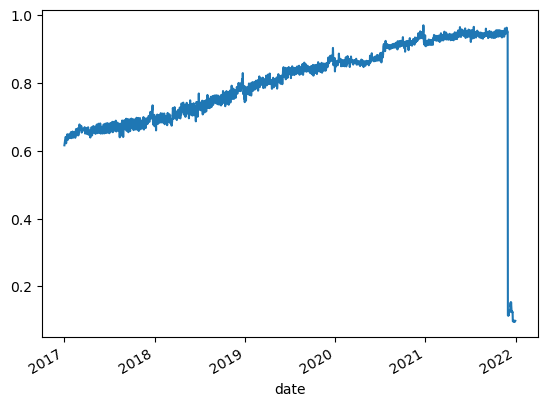

In [24]:
data_completeness_top200.plot()

In [25]:
data_completeness_top50 = top50.groupby("date").date.count() / ideal_daily_row_count_top50
data_completeness_top50

date
2017-01-01    0.723429
2017-01-02    0.749429
2017-01-03    0.761714
2017-01-04    0.756286
2017-01-05    0.754000
                ...   
2021-12-27    0.100000
2021-12-28    0.100000
2021-12-29    0.100000
2021-12-30    0.100000
2021-12-31    0.099714
Name: date, Length: 1823, dtype: float64

<AxesSubplot: xlabel='date'>

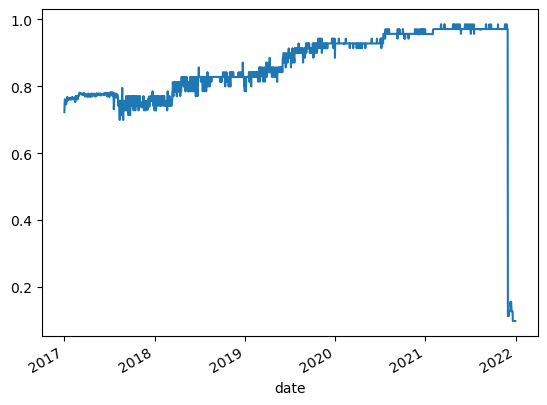

In [26]:
data_completeness_top50.plot()

In [27]:
data_completeness_top200.idxmax()

Timestamp('2020-12-24 00:00:00')

In [28]:
data_completeness_by_region = top200.set_index(["date", "region"])
data_completeness_by_region

title  rank  \
date       region                                         
2017-01-01 Argentina      Chantaje (feat. Maluma)     1   
           Argentina  Vente Pa' Ca (feat. Maluma)     2   
           Argentina   Reggaetón Lento (Bailemos)     3   
           Argentina                       Safari     4   
           Argentina                  Shaky Shaky     5   
...                                           ...   ...   
2018-01-31 Uruguay           Ojalá (feat. Darell)   196   
           Uruguay        Lo Que Pasa en la Noche   197   
           Uruguay                  El Equivocado   198   
           Uruguay              Que Fui Tu Amante   199   
           Uruguay                           Solo   200   

                                                     artist  \
date       region                                             
2017-01-01 Argentina                                Shakira   
           Argentina                           Ricky Martin   
           Argentina                                   CNCO   
           Argentina  J Balvin, Pharrell Williams, BIA, Sky   
           Argentina                           Daddy Yankee   
...                                                     ...   
2018-01-31 Uruguay     De La Ghetto, Almighty, Bryant Myers   
           Uruguay                              Mano Arriba   
           Uruguay                              Mano Arriba   
           Uruguay                      El Gucci y Su Banda   
           Uruguay                      Amenazzy, Lary Over   

                                                                    url  \
date       region                                                         
2017-01-01 Argentina  https://open.spotify.com/track/6mICuAdrwEjh6Y6...   
           Argentina  https://open.spotify.com/track/7DM4BPaS7uofFul...   
           Argentina  https://open.spotify.com/track/3AEZUABDXNtecAO...   
           Argentina  https://open.spotify.com/track/6rQSrBHf7HlZjtc...   
           Argentina  https://open.spotify.com/track/58IL315gMSTD37D...   
...                                                                 ...   
2018-01-31 Uruguay    https://open.spotify.com/track/3EMDvnVpQd9RZJv...   
           Uruguay    https://open.spotify.com/track/2eOleVJlGvBE027...   
           Uruguay    https://open.spotify.com/track/5vy1C7DD9xJ5fRB...   
           Uruguay    https://open.spotify.com/track/1fmiCxwEbZFIszI...   
           Uruguay    https://open.spotify.com/track/2rrJfOphzn4uQCK...   

                              trend   streams  
date       region                              
2017-01-01 Argentina  SAME_POSITION  253019.0  
           Argentina        MOVE_UP  223988.0  
           Argentina      MOVE_DOWN  210943.0  
           Argentina  SAME_POSITION  173865.0  
           Argentina        MOVE_UP  153956.0  
...                             ...       ...  
2018-01-31 Uruguay        MOVE_DOWN    1178.0  
           Uruguay        NEW_ENTRY    1178.0  
           Uruguay        MOVE_DOWN    1170.0  
           Uruguay        MOVE_DOWN    1165.0  
           Uruguay        NEW_ENTRY    1162.0  

[20321904 rows x 6 columns]

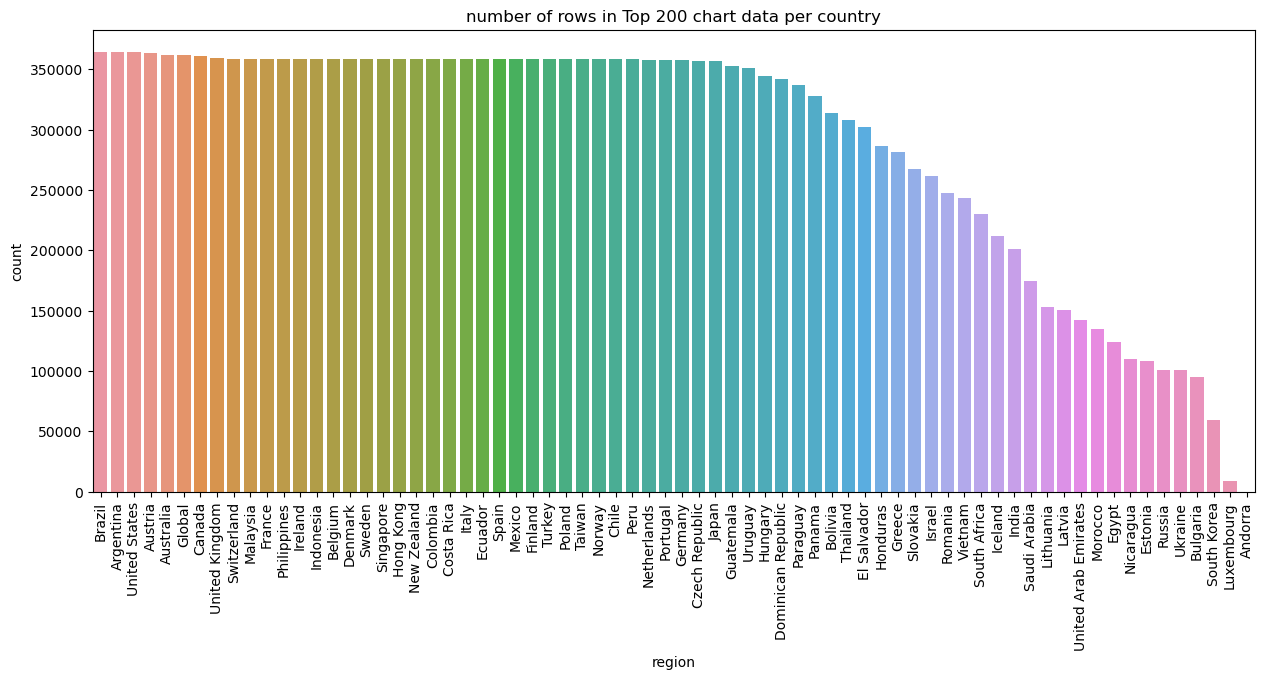

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(top200, x="region", order=top200.region.value_counts().index)
plt.title("number of rows in Top 200 chart data per country")
plt.tick_params(axis='x', rotation=90)
plt.show()

In [30]:
top200_region_counts = top200.groupby("region").region.count()
top200_region_counts

region
Andorra                      0
Argentina               364385
Australia               362189
Austria                 363925
Belgium                 358390
                         ...  
South Africa            230207
United Arab Emirates    142053
Russia                  100768
South Korea              59576
Ukraine                 100766
Name: region, Length: 70, dtype: int64

In [31]:
top200_counts_by_region_and_date = top200.groupby(["region", "date"]).url.count().rename("track_count").reset_index().set_index("date")
top200_counts_by_region_and_date

,region,track_count
date,,
2017-01-01,Andorra,0
2017-01-02,Andorra,0
2017-01-03,Andorra,0
2017-01-04,Andorra,0
2017-01-05,Andorra,0
...,...,...
2021-12-27,Ukraine,0
2021-12-28,Ukraine,0
2021-12-29,Ukraine,0


In [32]:
top200_track_count_stats = top200_counts_by_region_and_date.groupby("region").track_count.describe()
top200_track_count_stats

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Andorra,1823.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Argentina,1823.0,199.882063,4.686298,0.0,200.0,200.0,200.0,200.0
Australia,1823.0,198.677455,16.177635,0.0,200.0,200.0,200.0,200.0
Austria,1823.0,199.629731,4.949419,0.0,200.0,200.0,200.0,200.0
Belgium,1823.0,196.593527,25.864629,0.0,200.0,200.0,200.0,200.0
...,...,...,...,...,...,...,...,...
South Africa,1823.0,126.279210,89.196852,0.0,0.0,200.0,200.0,200.0
United Arab Emirates,1823.0,77.922655,84.260690,0.0,0.0,65.0,168.0,200.0
Russia,1823.0,55.275919,89.446414,0.0,0.0,0.0,200.0,200.0


<AxesSubplot: title={'center': 'Mean Top 200 track counts per country'}, xlabel='region'>

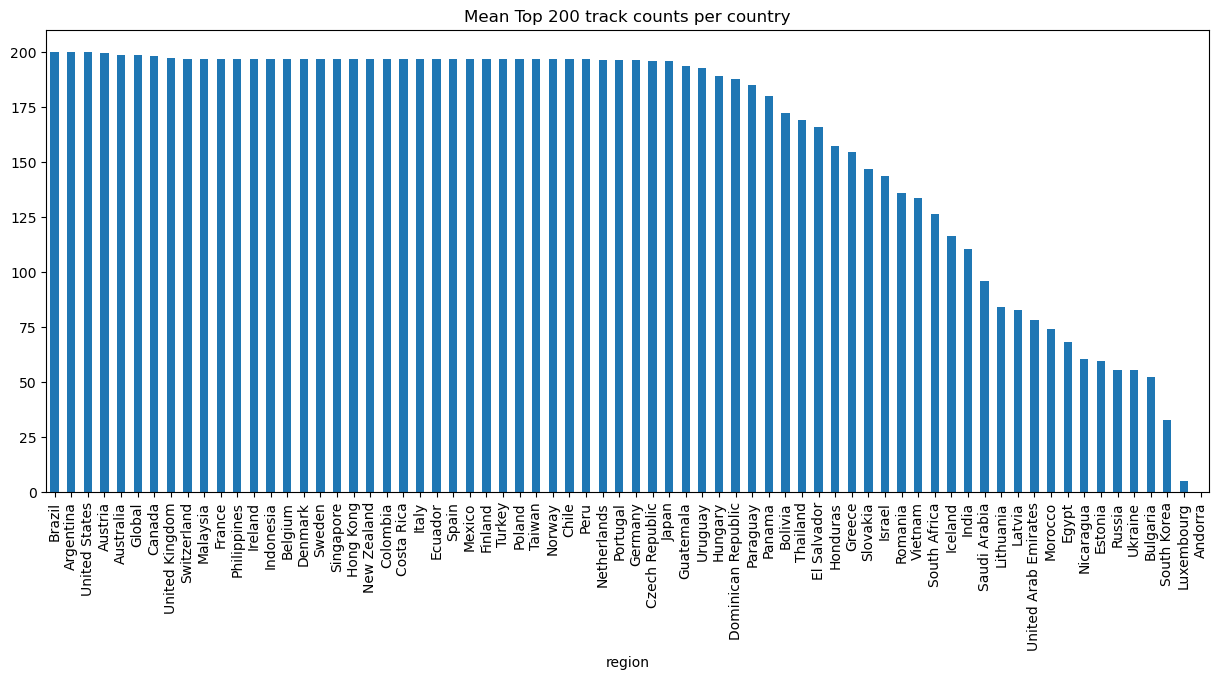

In [33]:
plt.figure(figsize=(15,6))
plt.title("Mean Top 200 track counts per country")
top200_track_count_stats.sort_values(by="mean", ascending=False)["mean"].plot(kind="bar")

<AxesSubplot: title={'center': '25% quantiles of Top 200 track counts per country'}, xlabel='region'>

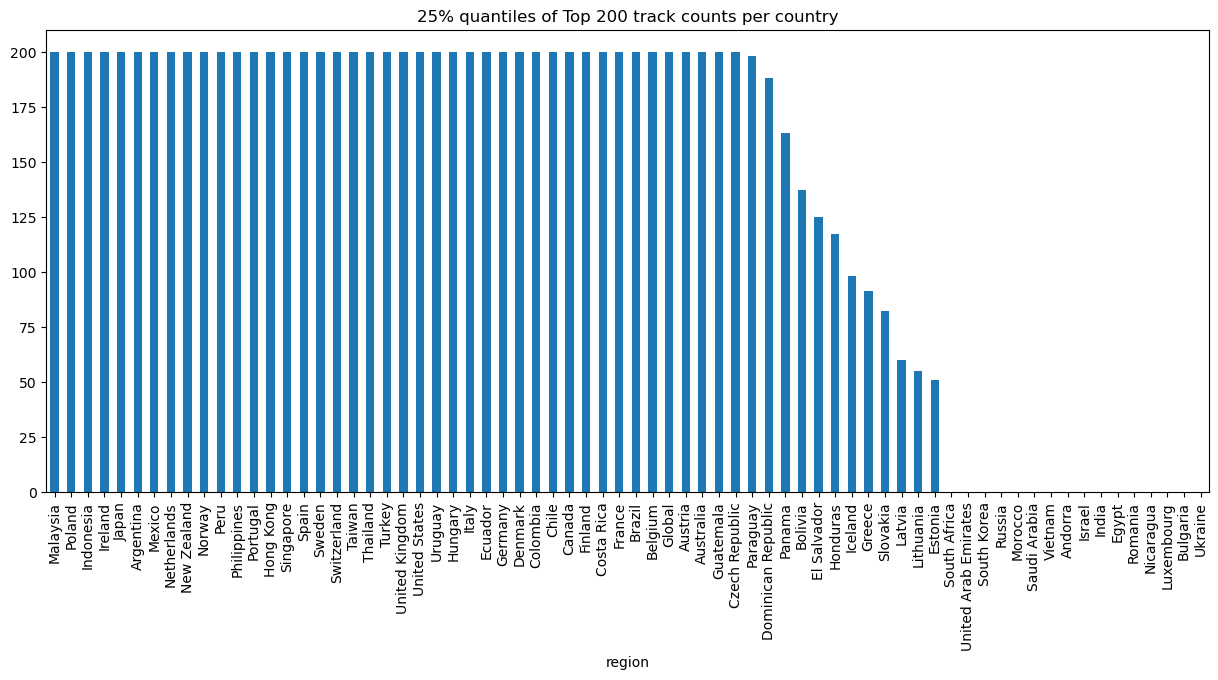

In [34]:
plt.figure(figsize=(15,6))
plt.title("25% quantiles of Top 200 track counts per country")
top200_track_count_stats.sort_values(by="25%", ascending=False)["25%"].plot(kind="bar")

### Looking at stats for Top 50

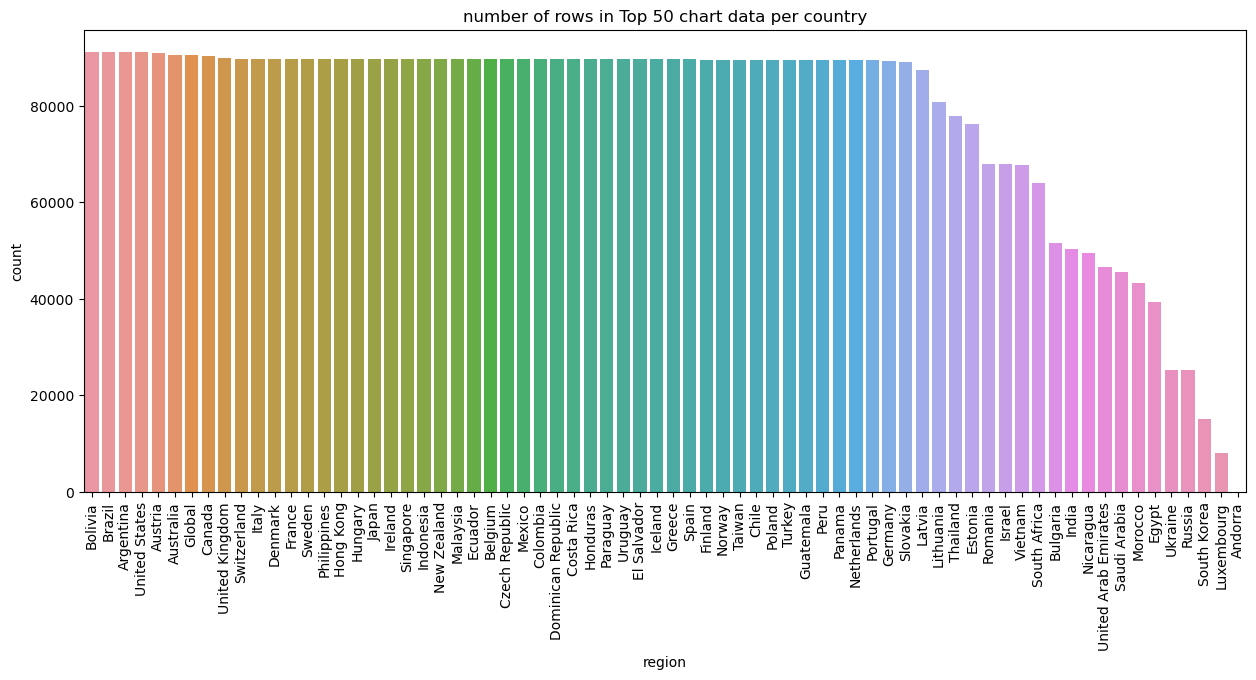

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(top50, x="region", order=top50.region.value_counts().index)
plt.title("number of rows in Top 50 chart data per country")
plt.tick_params(axis='x', rotation=90)
plt.show()

In [36]:
top50_counts_by_region_and_date = top50.groupby(["region", "date"]).url.count().rename("track_count").reset_index().set_index("date")
top50_counts_by_region_and_date

,region,track_count
date,,
2017-01-01,Andorra,0
2017-01-02,Andorra,0
2017-01-03,Andorra,0
2017-01-04,Andorra,0
2017-01-05,Andorra,0
...,...,...
2021-12-27,Ukraine,0
2021-12-28,Ukraine,0
2021-12-29,Ukraine,0


<AxesSubplot: xlabel='date'>

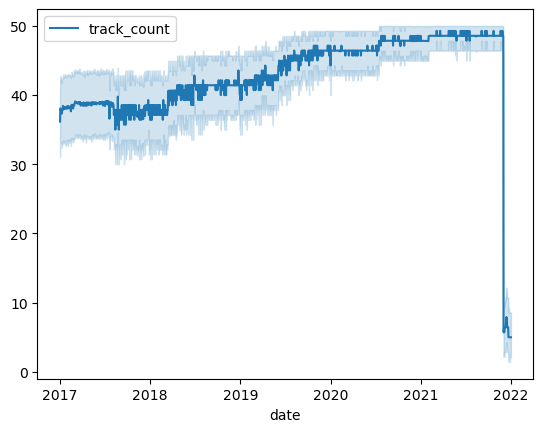

In [37]:
sns.lineplot(top50_counts_by_region_and_date)

In [38]:
top50_counts_by_region_and_date["complete"] = top50_counts_by_region_and_date.track_count == 50
top50_counts_by_region_and_date

,region,track_count,complete
date,,,
2017-01-01,Andorra,0,False
2017-01-02,Andorra,0,False
2017-01-03,Andorra,0,False
2017-01-04,Andorra,0,False
2017-01-05,Andorra,0,False
...,...,...,...
2021-12-27,Ukraine,0,False
2021-12-28,Ukraine,0,False
2021-12-29,Ukraine,0,False


In [39]:
top50_counts_by_region_pivot = top50_counts_by_region_and_date.reset_index().pivot(
    columns=["region"], index="date", values="track_count"
)


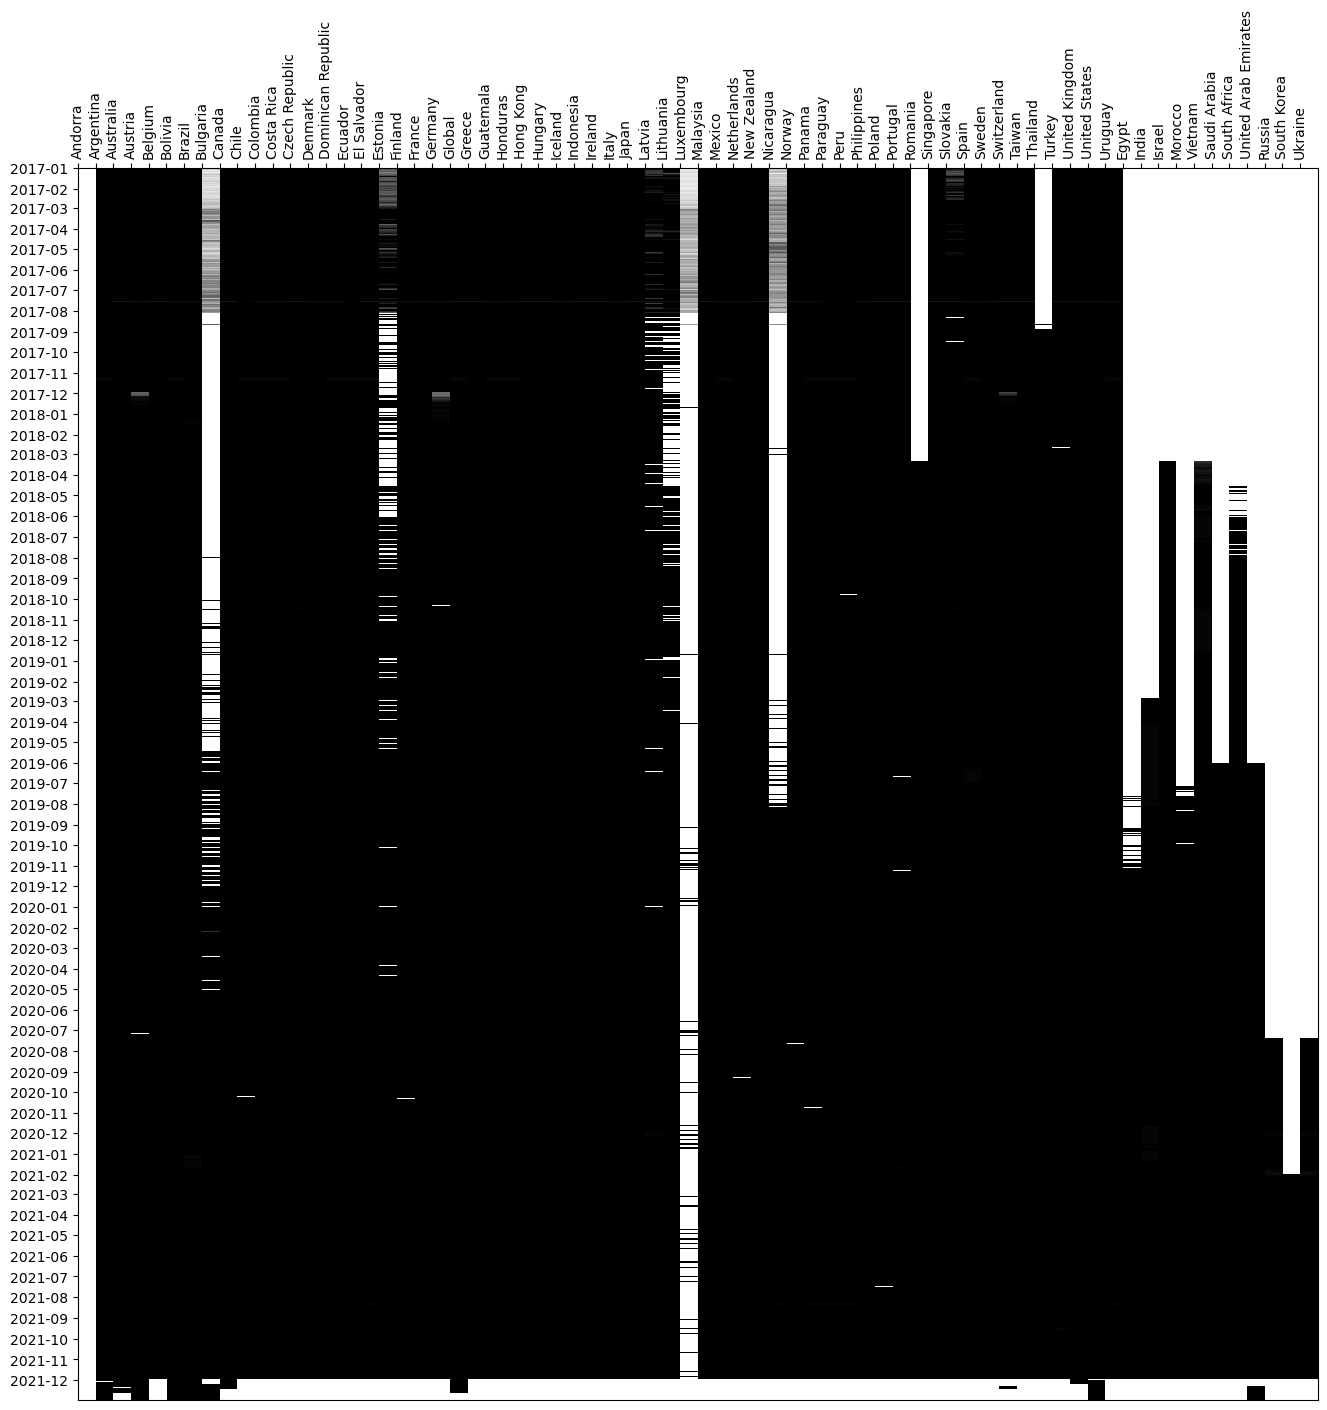

In [40]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 16))
min_date = mdates.date2num(top50_counts_by_region_and_date.index.min())
max_date = mdates.date2num(top50_counts_by_region_and_date.index.max())

plt.gca().xaxis.tick_top()
plt.xticks(ticks=list(range(len(top50_counts_by_region_pivot.columns))), labels=top50_counts_by_region_pivot.columns, rotation=90)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_locator(mdates.MonthLocator())

plt.imshow(
    top50_counts_by_region_pivot,
    aspect="auto",
    extent=[0, 70, max_date, min_date],
    cmap="Greys",
    interpolation="none",
)
plt.show()

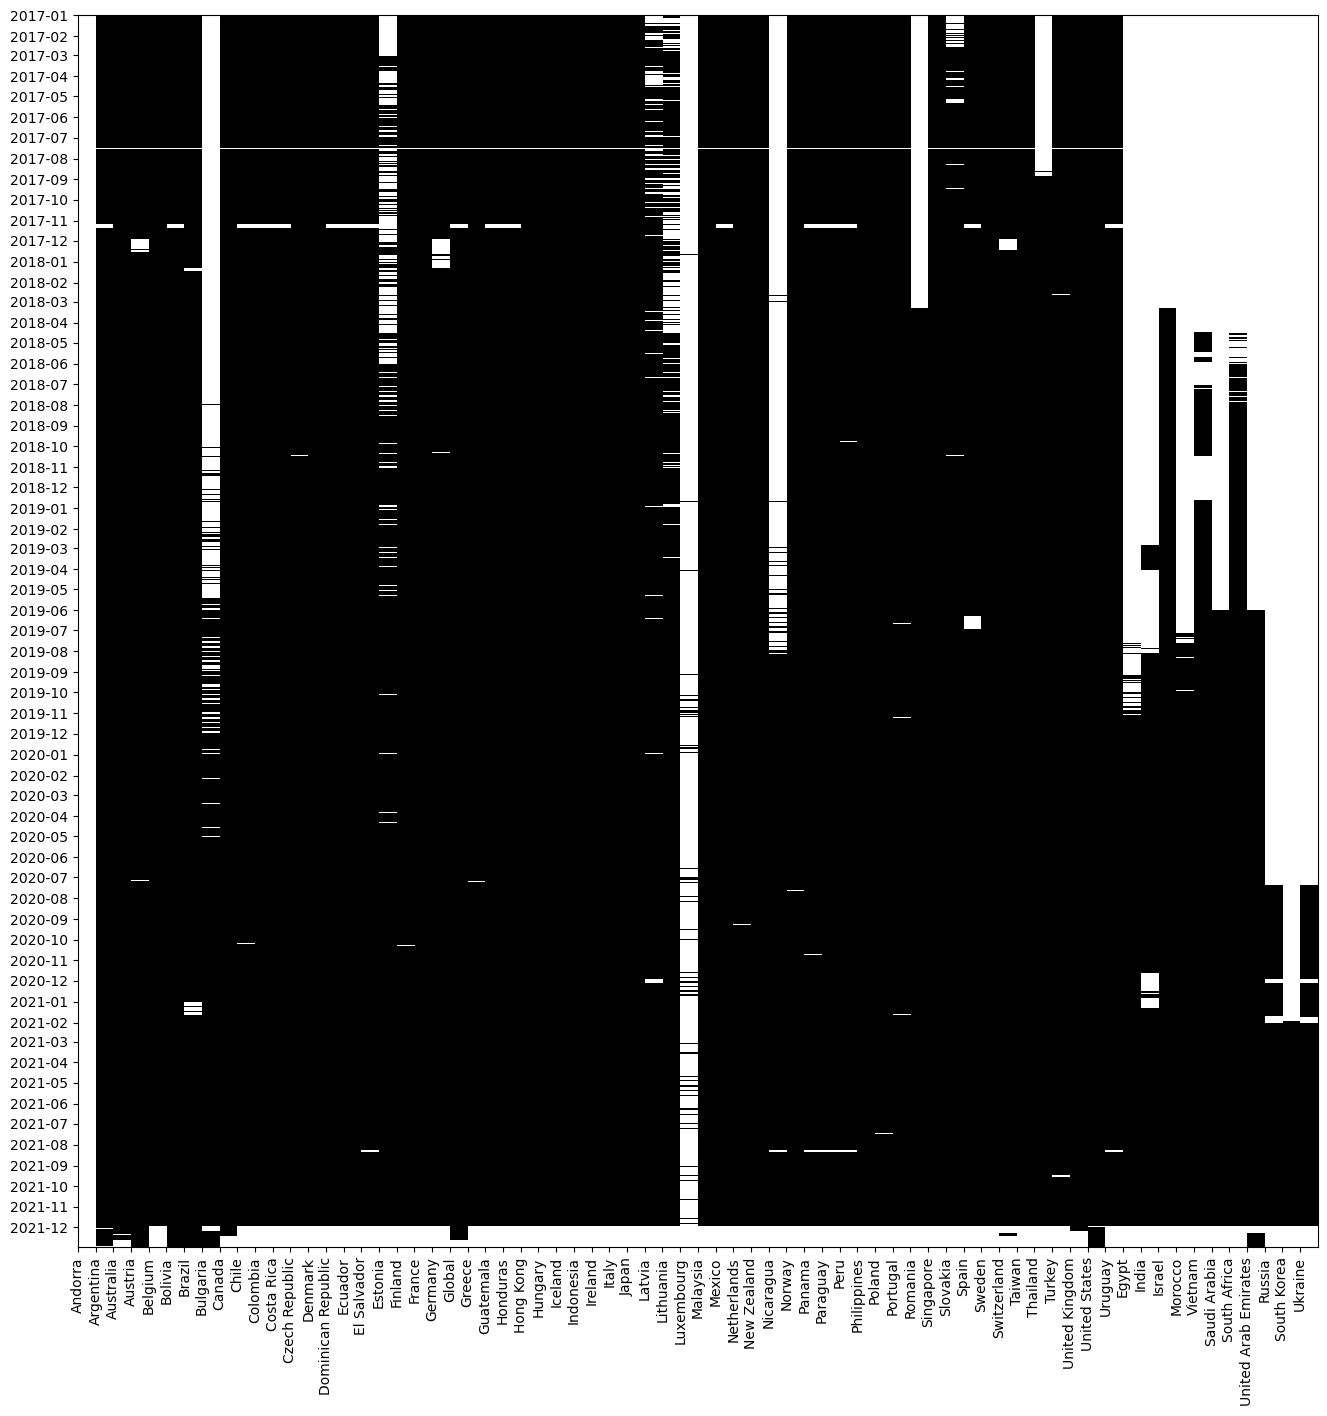

In [41]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

top50_completes_by_region_pivot = top50_counts_by_region_and_date.reset_index().pivot(
    columns=["region"], index="date", values="complete"
)

plt.figure(figsize=(16, 16))
min_date = mdates.date2num(top50_counts_by_region_and_date.index.min())
max_date = mdates.date2num(top50_counts_by_region_and_date.index.max())

plt.xticks(ticks=list(range(len(top50_completes_by_region_pivot.columns))), labels=top50_completes_by_region_pivot.columns, rotation=90)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_locator(mdates.MonthLocator())

plt.imshow(
    top50_completes_by_region_pivot,
    aspect="auto",
    extent=[0, 70, max_date, min_date],
    cmap="Greys",
    interpolation="none",
)
plt.show()

We see that hardly any data is available for December 2021, so we should delete it.

In [42]:
top50_track_count_stats = top50_counts_by_region_and_date.groupby("region").track_count.describe()
top50_track_count_stats

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Andorra,1823.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Argentina,1823.0,49.967636,1.173035,0.0,50.0,50.0,50.0,50.0
Australia,1823.0,49.666484,4.046195,0.0,50.0,50.0,50.0,50.0
Austria,1823.0,49.907296,1.473761,0.0,50.0,50.0,50.0,50.0
Belgium,1823.0,49.145365,6.467027,0.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...
South Africa,1823.0,35.106967,22.872171,0.0,0.0,50.0,50.0,50.0
United Arab Emirates,1823.0,25.562260,25.000534,0.0,0.0,50.0,50.0,50.0
Russia,1823.0,13.811849,22.350374,0.0,0.0,0.0,50.0,50.0


<AxesSubplot: title={'center': 'Mean Top 50 track counts per region'}, xlabel='region'>

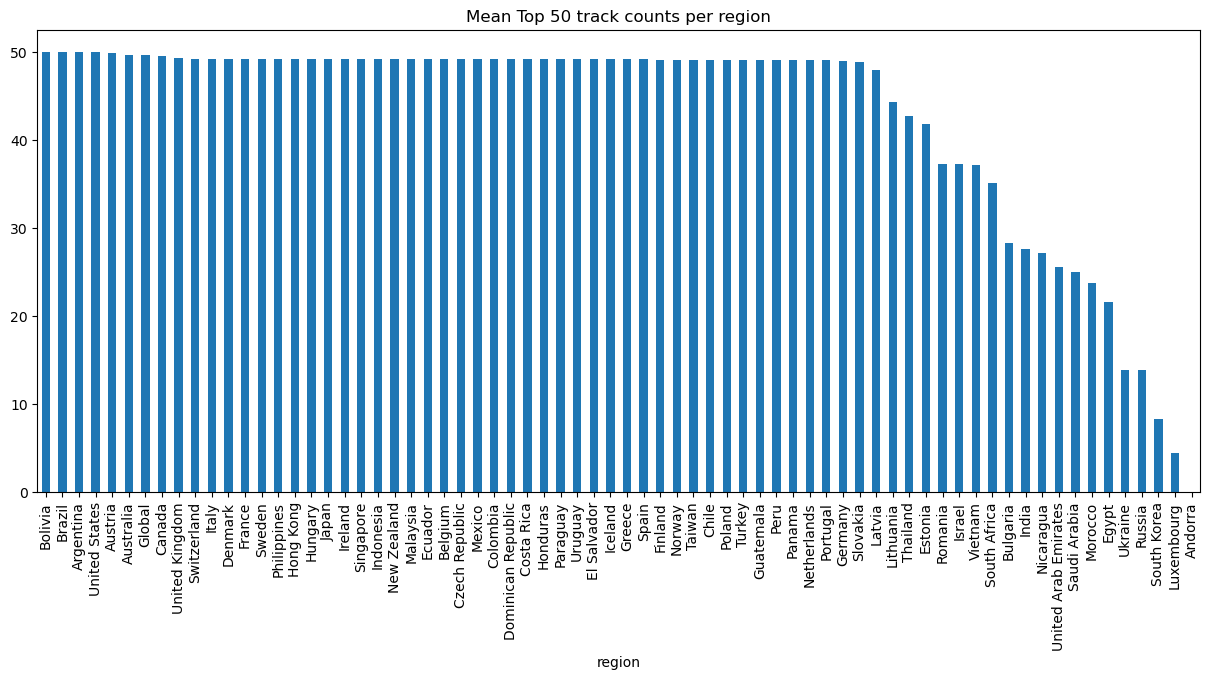

In [43]:
plt.figure(figsize=(15,6))
plt.title("Mean Top 50 track counts per region")
top50_mean_region_track_counts = top50_track_count_stats.sort_values(by="mean", ascending=False)["mean"]
top50_mean_region_track_counts.plot(kind="bar")

Seems like it would make stuff easier for us if we used let's say the 50 regions with highest mean track counts.

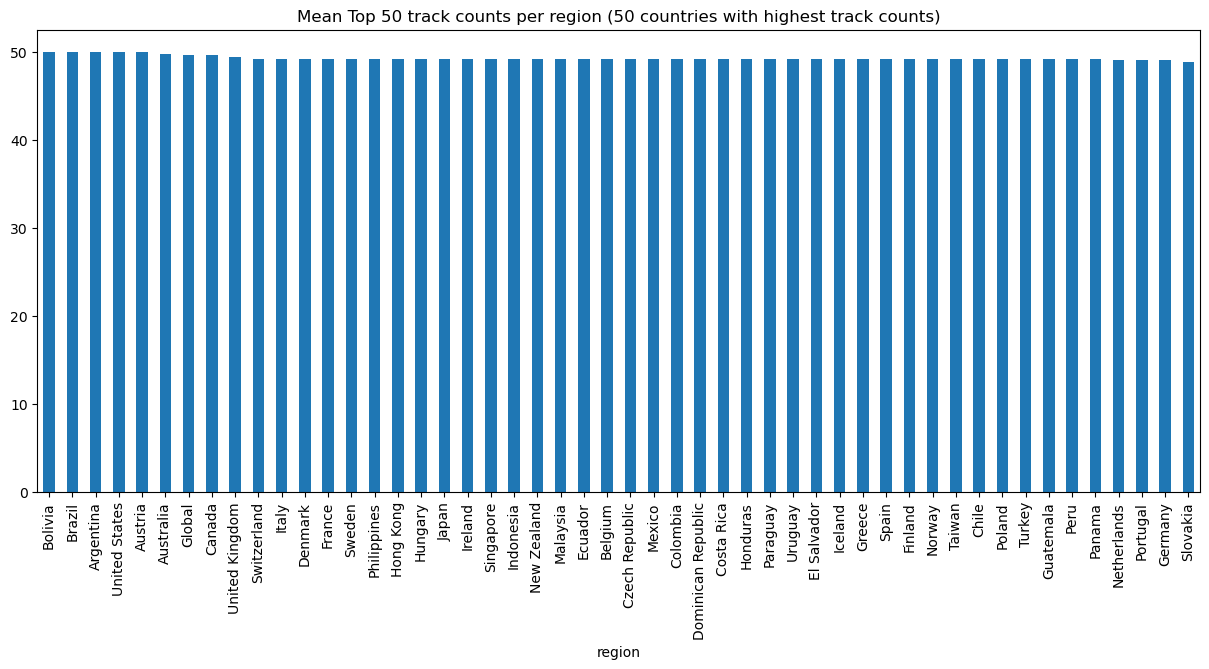

In [44]:
plt.figure(figsize=(15,6))
plt.title("Mean Top 50 track counts per region (50 countries with highest track counts)")
top50_mean_region_track_counts[:50].plot(kind="bar")
plt.show()

In [45]:
regions_with_good_data_coverage = top50_mean_region_track_counts[:50].index.tolist()
regions_with_good_data_coverage

['Bolivia',
 'Brazil',
 'Argentina',
 'United States',
 'Austria',
 'Australia',
 'Global',
 'Canada',
 'United Kingdom',
 'Switzerland',
 'Italy',
 'Denmark',
 'France',
 'Sweden',
 'Philippines',
 'Hong Kong',
 'Hungary',
 'Japan',
 'Ireland',
 'Singapore',
 'Indonesia',
 'New Zealand',
 'Malaysia',
 'Ecuador',
 'Belgium',
 'Czech Republic',
 'Mexico',
 'Colombia',
 'Dominican Republic',
 'Costa Rica',
 'Honduras',
 'Paraguay',
 'Uruguay',
 'El Salvador',
 'Iceland',
 'Greece',
 'Spain',
 'Finland',
 'Norway',
 'Taiwan',
 'Chile',
 'Poland',
 'Turkey',
 'Guatemala',
 'Peru',
 'Panama',
 'Netherlands',
 'Portugal',
 'Germany',
 'Slovakia']

If we want to keep only the "good data", we should therefore use this list of 50 countries and remove all data for December 2021

/tmp/ipykernel_77629/3291844022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data.region = good_data.region.cat.remove_unused_categories()


<AxesSubplot: >

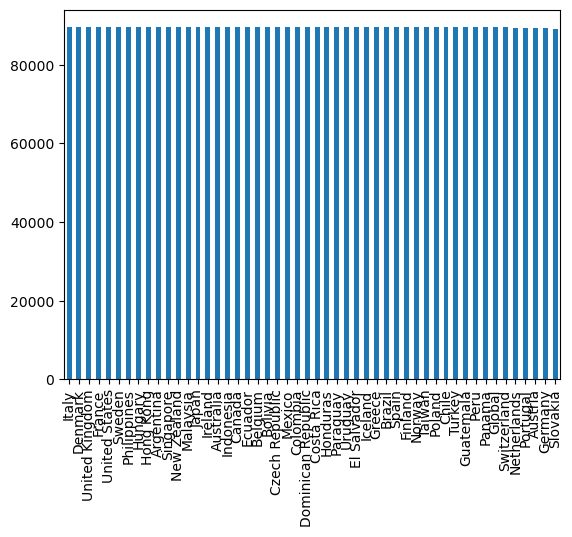

In [46]:
good_data = top50.loc[(top50.region.isin(regions_with_good_data_coverage)) & (top50.date < "2021-12-01")]
good_data.region = good_data.region.cat.remove_unused_categories()
good_data.region.value_counts().plot(kind="bar")

In [47]:
good_data_counts_by_region = good_data.groupby(["region", "date"]).url.count().rename("track_count").reset_index().set_index("date")

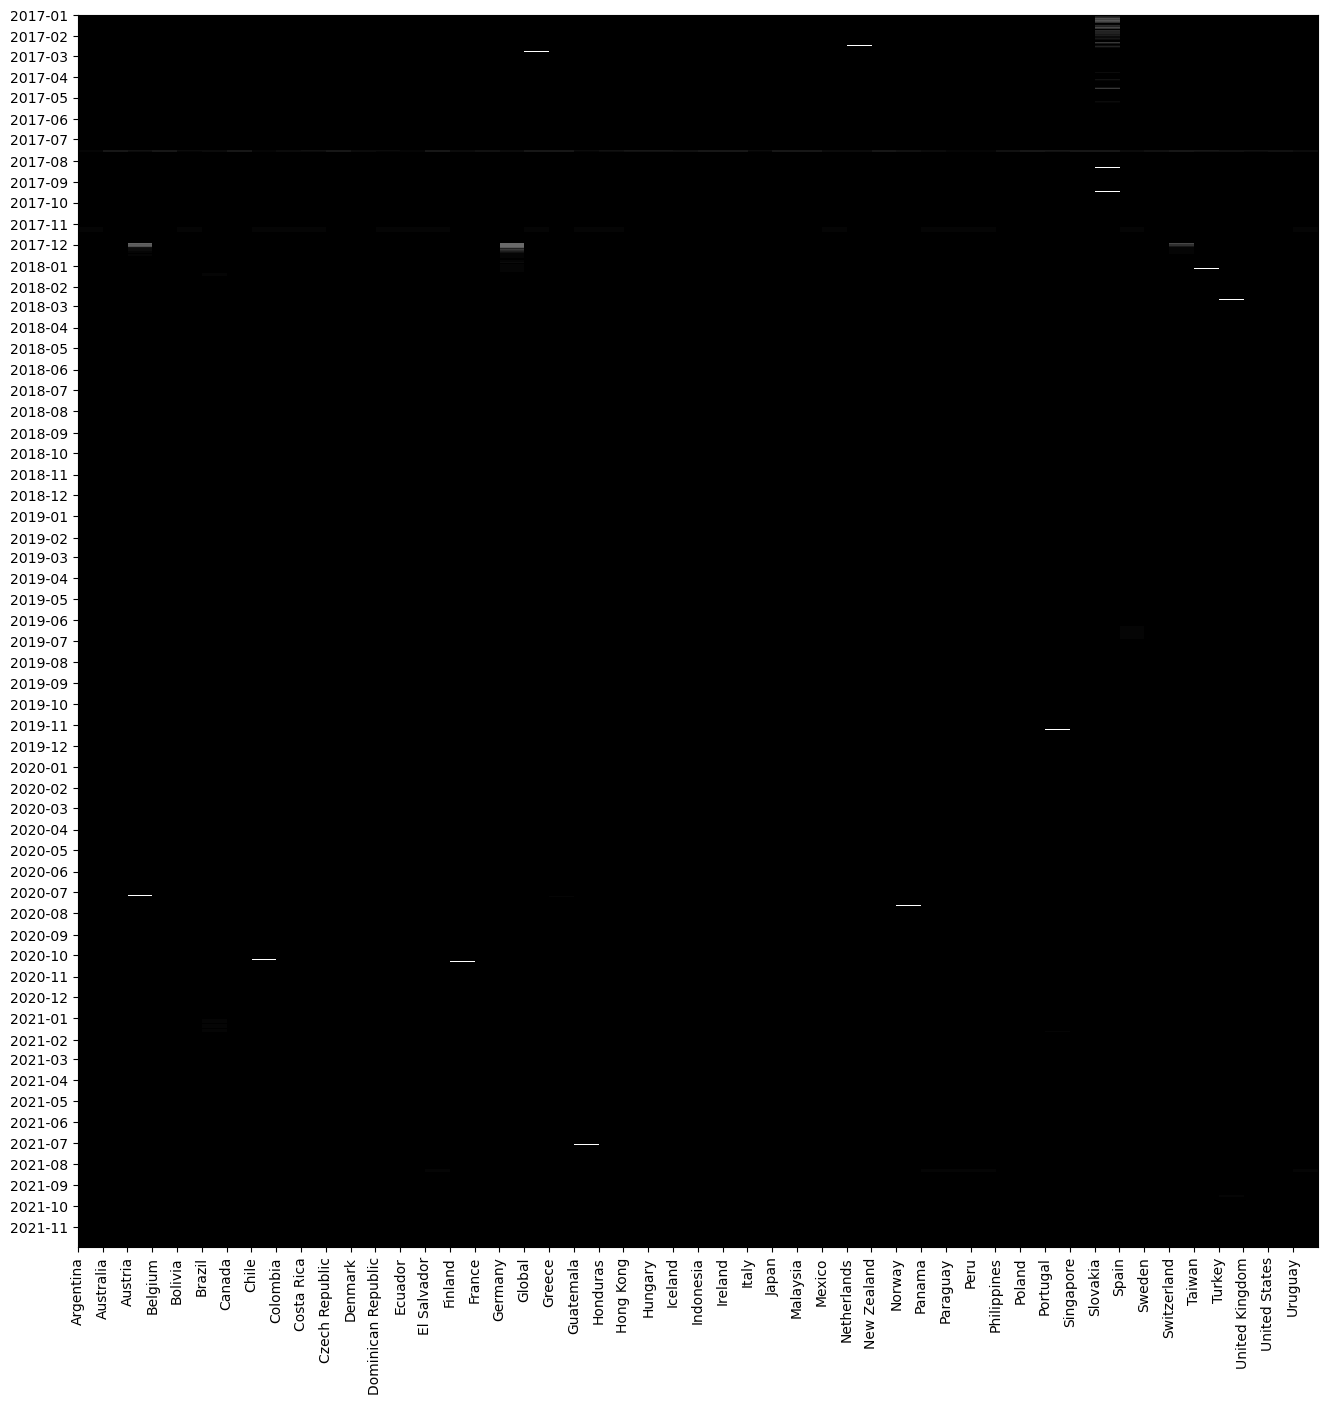

In [48]:
good_data_counts_by_region_pivot = good_data_counts_by_region.reset_index().pivot(
    columns=["region"], index="date", values="track_count"
)

plt.figure(figsize=(16, 16))
min_date = mdates.date2num(good_data_counts_by_region.index.min())
max_date = mdates.date2num(good_data_counts_by_region.index.max())

plt.xticks(ticks=list(range(len(good_data_counts_by_region_pivot.columns))), labels=good_data_counts_by_region_pivot.columns, rotation=90)

y_axis = plt.gca().yaxis
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
y_axis.set_major_locator(mdates.MonthLocator())

plt.imshow(
    good_data_counts_by_region_pivot,
    aspect="auto",
    extent=[0, 50, max_date, min_date],
    cmap="Greys",
    interpolation="none",
)
plt.show()

This looks pretty good! But we still have some blank spots in the data.

How much data do we have in general?

In [49]:
good_data_counts_by_region

,region,track_count
date,,
2017-01-01,Argentina,50
2017-01-02,Argentina,50
2017-01-03,Argentina,50
2017-01-04,Argentina,50
2017-01-05,Argentina,50
...,...,...
2021-11-26,Uruguay,50
2021-11-27,Uruguay,50
2021-11-28,Uruguay,50


In [54]:
incomplete_data = good_data_counts_by_region.loc[good_data_counts_by_region.track_count < 50].sort_values(by = "track_count")
incomplete_data

,region,track_count
date,,
2018-01-07,Taiwan,0
2017-09-24,Slovakia,0
2017-09-17,Slovakia,0
2021-07-04,Guatemala,0
2017-08-27,Slovakia,0
...,...,...
2018-01-05,Germany,49
2018-01-04,Germany,49
2018-01-03,Germany,49


actually, data is missing only for a relatively small number of dates and regions. This would maybe even be feasible with scraping! So, let's store the relevant data in a CSV:

In [55]:
incomplete_data.to_csv(create_data_out_path("missing_chart_data.csv"))

Data output path: /home/sejmou/Repos/Uni/VisDS/vis-ds/data/missing_chart_data.csv


In [52]:
good_data_counts_by_region.loc[good_data_counts_by_region.track_count < 40]

,region,track_count
date,,
2017-12-01,Austria,33
2017-12-02,Austria,34
2017-12-03,Austria,36
2017-12-04,Austria,34
2017-12-05,Austria,35
2017-12-06,Austria,38
2020-07-07,Austria,0
2020-10-08,Chile,0
2020-10-11,Finland,0


We see that "more severe" cases of missing data are even rarer.

## Export data

In [57]:
good_data.columns

Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'trend', 'streams'], dtype='object')

In [59]:
good_data.to_csv(create_data_out_path("top50_almost_complete.csv"), index=False)

Data output path: /home/sejmou/Repos/Uni/VisDS/vis-ds/data/top50_almost_complete.csv


Let's also store the missing Top 50 chart dates+regions for December 2021. If we manage to scrape that data as well, we have a nice, complete dataset of 5 years of Spotify charts!

In [79]:
df = top50_counts_by_region_and_date.reset_index()
incomplete_data_dec_2021 = df.loc[
    (df.date > "2021-11-30")
    & (df.track_count < 50)
    & (df.region.isin(regions_with_good_data_coverage))
].drop(columns="complete").sort_values(by="track_count")
incomplete_data_dec_2021

,date,region,track_count
3618,2021-12-04,Argentina,0
76550,2021-12-16,Panama,0
76549,2021-12-15,Panama,0
76548,2021-12-14,Panama,0
76547,2021-12-13,Panama,0
...,...,...,...
41925,2021-12-28,Greece,0
41924,2021-12-27,Greece,0
43724,2021-12-04,Guatemala,0
107556,2021-12-31,Uruguay,0


In [80]:
incomplete_data_dec_2021.to_csv(create_data_out_path("missing_chart_data_dec_2021.csv"), index=False)

Data output path: /home/sejmou/Repos/Uni/VisDS/vis-ds/data/missing_chart_data_dec_2021.csv
